<a href="https://colab.research.google.com/github/marwah-habibah-rangkuti/Remedial_StatistikaMultivariat/blob/main/Remed_UTS_StatMul_040_Marwah_Habibah_Rangkuti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Pengaruh Jenis Olahraga terhadap Indikator Kesehatan Metabolik pada Dewasa Muda Menggunakan MANOVA**
----
----
**Nama:** Marwah Habibah Rangkuti\
**NIM:** 11220940000040

## **Install dan Import Library**

In [35]:
!pip install pingouin

In [36]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.multivariate.manova import MANOVA

## **MANOVA**
Sebuah tim peneliti biomedis ingin mengetahui apakah jenis olahraga yang dilakukan secara rutin memengaruhi kesehatan metabolik. Mereka membagi peserta dewasa muda menjadi tiga kelompok berdasarkan jenis olahraga yang dilakukan selama 12 minggu. 1 kelompok melakukan angkat beban, 1 kelompok melakukan jogging, dan 1 kelompok melakukan yoga. Setelah itu, mereka membandingkan data kadar gula darah, kolesterol, dan tekanan darah sistolik dari ketiga kelompok tersebut.

In [37]:
url = 'https://raw.githubusercontent.com/marwah-habibah-rangkuti/Remedial_StatistikaMultivariat/main/Data%20Manova.xlsx'
data_manova = pd.read_excel(url, engine='openpyxl')
data_manova

,Kelompok,Gula_Darah,Kolesterol,Tekanan_Darah_Sistolik
0,Angkat Beban,94,203,123
1,Angkat Beban,92,202,125
2,Angkat Beban,95,198,130
3,Angkat Beban,99,193,119
4,Angkat Beban,96,195,127
5,Angkat Beban,97,200,123
6,Angkat Beban,101,188,116
7,Angkat Beban,96,195,133
8,Angkat Beban,101,200,125
9,Angkat Beban,90,217,126


### **Uji Normalitas Multivariat**

In [38]:
data_angkat_beban = data_manova.loc[data_manova['Kelompok']=='Angkat Beban', ['Gula_Darah', 'Kolesterol', 'Tekanan_Darah_Sistolik']]
data_jogging = data_manova.loc[data_manova['Kelompok']=='Jogging', ['Gula_Darah', 'Kolesterol', 'Tekanan_Darah_Sistolik']]
data_yoga = data_manova.loc[data_manova['Kelompok']=='Yoga', ['Gula_Darah', 'Kolesterol', 'Tekanan_Darah_Sistolik']]

In [39]:
print('uji normalitas multivariat Angkat Beban: ', pg.multivariate_normality(data_angkat_beban, alpha=0.05))
print('uji normalitas multivariat Jogging: ', pg.multivariate_normality(data_jogging, alpha=0.05))
print('uji normalitas multivariat Yoga: ', pg.multivariate_normality(data_yoga, alpha=0.05))

uji normalitas multivariat Angkat Beban:  HZResults(hz=np.float64(11.852724583533469), pval=np.float64(8.00682239426454e-37), normal=False)
uji normalitas multivariat Jogging:  HZResults(hz=np.float64(11.852724583533469), pval=np.float64(8.00682239426454e-37), normal=False)
uji normalitas multivariat Yoga:  HZResults(hz=np.float64(11.852724583533469), pval=np.float64(8.00682239426454e-37), normal=False)


Data tidak berdistribusi normal multivariat, sehingga perlu menerapkan transformasi data.

In [40]:
# Transformasi
data_angkat_beban_trans = np.log(data_angkat_beban)
data_jogging_trans = np.log(data_jogging)
data_yoga_trans = np.log(data_yoga)

Lalu lakukan lagi uji normalitas multivariatnya.

In [41]:
print('uji normalitas multivariat Angkat Beban: ', pg.multivariate_normality(data_angkat_beban_trans, alpha=0.05))
print('uji normalitas multivariat Jogging: ', pg.multivariate_normality(data_jogging_trans, alpha=0.05))
print('uji normalitas multivariat Yoga: ', pg.multivariate_normality(data_yoga_trans, alpha=0.05))

uji normalitas multivariat Angkat Beban:  HZResults(hz=np.float64(0.777265244168045), pval=np.float64(0.08437085492071694), normal=True)
uji normalitas multivariat Jogging:  HZResults(hz=np.float64(0.4851150373277968), pval=np.float64(0.7154686199299052), normal=True)
uji normalitas multivariat Yoga:  HZResults(hz=np.float64(0.7292312558294978), pval=np.float64(0.1328625580225365), normal=True)


Data sudah berdistribusi normal multivariat.

### **Uji Homogenitas**

In [42]:
# Gabungkan lagi datanya
kelompok = data_trans_manova.pop('Kelompok')
data_trans_manova.insert(0, 'Kelompok', kelompok)
data_trans_manova

,Kelompok,Gula_Darah,Kolesterol,Tekanan_Darah_Sistolik
0,Angkat Beban,4.543295,5.313206,4.812184
1,Angkat Beban,4.521789,5.308268,4.828314
2,Angkat Beban,4.553877,5.288267,4.867534
3,Angkat Beban,4.595120,5.262690,4.779123
4,Angkat Beban,4.564348,5.273000,4.844187
5,Angkat Beban,4.574711,5.298317,4.812184
6,Angkat Beban,4.615121,5.236442,4.753590
7,Angkat Beban,4.564348,5.273000,4.890349
8,Angkat Beban,4.615121,5.298317,4.828314
9,Angkat Beban,4.499810,5.379897,4.836282


In [43]:
# Uji Homogenitas
pg.box_m(data_trans_manova, dvs=['Gula_Darah', 'Kolesterol', 'Tekanan_Darah_Sistolik'], group='Kelompok')

,Chi2,df,pval,equal_cov
box,17.661687,12.0,0.126356,True


Data sudah homogen.

### **Uji MANOVA**

In [44]:
manova_model = MANOVA.from_formula('Gula_Darah + Kolesterol + Tekanan_Darah_Sistolik ~ Kelompok', data=data_trans_manova)
manova_results = manova_model.mv_test()
print(manova_results)

                     Multivariate linear model
                                                                   
-------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF   F Value   Pr > F
-------------------------------------------------------------------
          Wilks' lambda    0.0001 3.0000 55.0000 153611.3036 0.0000
         Pillai's trace    0.9999 3.0000 55.0000 153611.3036 0.0000
 Hotelling-Lawley trace 8378.7984 3.0000 55.0000 153611.3036 0.0000
    Roy's greatest root 8378.7984 3.0000 55.0000 153611.3036 0.0000
-------------------------------------------------------------------
                                                                   
--------------------------------------------------------------------
          Kelompok         Value   Num DF   Den DF   F Value  Pr > F
--------------------------------------------------------------------
            Wilks' lambda  0.3429  6.0000  110.0000  12.9759  0.00

Terdapat perbedaan signifikan antar kelompok pada ketiga variabel dependen secara multivariat. Dengan demikian, variabel Kelompok memiliki pengaruh signifikan terhadap variasi nilai pada ketiga variabel dependen.


### **Univariate ANOVA**

In [45]:
# Pisahkan variabel dependent dan independen
independent_var = 'Kelompok'
dependent_vars = [col for col in data_trans_manova.columns if col != independent_var]

# Jalankan ANOVA satu per satu
for var in dependent_vars:
    print(f'\n=== ANOVA untuk variabel {var} ===')
    anova = pg.anova(dv=var, between=independent_var, data=data_trans_manova, detailed=True)
    print(anova)


=== ANOVA untuk variabel Gula_Darah ===
     Source        SS  DF        MS         F     p-unc       np2
0  Kelompok  0.057746   2  0.028873  16.66445  0.000002  0.368973
1    Within  0.098759  57  0.001733       NaN       NaN       NaN

=== ANOVA untuk variabel Kolesterol ===
     Source        SS  DF        MS          F         p-unc       np2
0  Kelompok  0.244144   2  0.122072  40.739656  1.030300e-11  0.588386
1    Within  0.170794  57  0.002996        NaN           NaN       NaN

=== ANOVA untuk variabel Tekanan_Darah_Sistolik ===
     Source        SS  DF        MS         F     p-unc       np2
0  Kelompok  0.032305   2  0.016152  6.394706  0.003122  0.183257
1    Within  0.143977  57  0.002526       NaN       NaN       NaN


Ada perbedaan yang signifikan antara kelompok untuk variabel Gula_Darah, variabel Kolesterol, dan variabel Tekanan_Darah_Sistolik.

### **Uji Post-hoc**

Karena hasil untuk Univariate ANOVA signifikan, maka bisa dilanjutkan dengan Uji post-hoc untuk melihat pasangan kelompok mana yang berbeda signifikan antar ketiga nya.

In [46]:
tukey_gula_darah = pg.pairwise_tukey(data=data_trans_manova, dv='Gula_Darah', between='Kelompok')
print("Tukey Post-hoc untuk variabel Gula Darah")
tukey_gula_darah

Tukey Post-hoc untuk variabel Gula Darah


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Angkat Beban,Jogging,4.538022,4.483738,0.054284,0.013163,4.124042,0.000355,1.170552
1,Angkat Beban,Yoga,4.538022,4.464827,0.073195,0.013163,5.560718,0.000002,1.799621
2,Jogging,Yoga,4.483738,4.464827,0.018911,0.013163,1.436676,0.329161,0.471913


In [23]:
tukey_kolesterol = pg.pairwise_tukey(data=data_trans_manova, dv='Kolesterol', between='Kelompok')
print("Tukey Post-hoc untuk variabel Kolesterol")
tukey_kolesterol

Tukey Post-hoc untuk variabel Kolesterol


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Angkat Beban,Jogging,5.269574,5.176846,0.092728,0.01731,5.356847,4.692203e-06,1.713866
1,Angkat Beban,Yoga,5.269574,5.114297,0.155277,0.01731,8.970293,5.159206e-12,2.592425
2,Jogging,Yoga,5.176846,5.114297,0.062549,0.01731,3.613447,1.826208e-03,1.173205


In [24]:
tukey_tekanan_darah_sistolik = pg.pairwise_tukey(data=data_trans_manova, dv='Tekanan_Darah_Sistolik', between='Kelompok')
print("Tukey Post-hoc untuk variabel Tekanan_Darah_Sistolik")
tukey_tekanan_darah_sistolik

Tukey Post-hoc untuk variabel Tekanan_Darah_Sistolik


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Angkat Beban,Jogging,4.808471,4.789164,0.019307,0.015893,1.214815,0.449417,0.402875
1,Angkat Beban,Yoga,4.808471,4.752522,0.055949,0.015893,3.520349,0.002429,1.014182
2,Jogging,Yoga,4.789164,4.752522,0.036642,0.015893,2.305534,0.063084,0.725907


Beberapa kelompok tidak menunjukkan perbedaan signifikan.

### **Visualisasi Data**

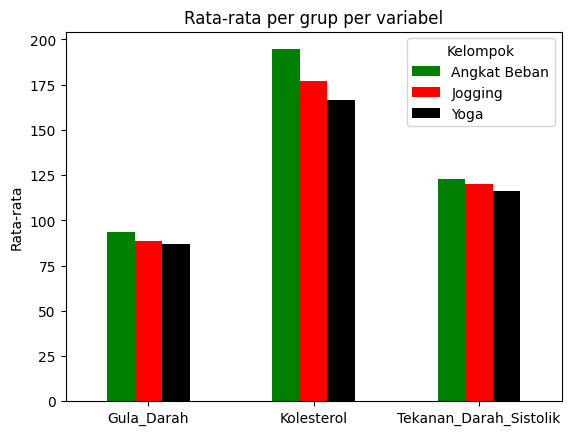

In [34]:
data_manova.groupby('Kelompok')[['Gula_Darah', 'Kolesterol', 'Tekanan_Darah_Sistolik']].mean().T.plot(kind='bar', color=['green', 'red', 'black'])
plt.title('Rata-rata per grup per variabel')
plt.ylabel('Rata-rata')
plt.xticks(rotation=0)
plt.show()

## **Kesimpulan**
Berdasarkan hasil analisis MANOVA dan visualisasi data, ketiga kelompok olahraga (Angkat Beban, Jogging, dan Yoga) menunjukkan perbedaan rata-rata pada kadar Gula Darah, Kolesterol, dan Tekanan Darah Sistolik. Namun, meskipun uji ANOVA menunjukkan signifikansi secara statistik, hasil uji post-hoc mengindikasikan bahwa tidak semua pasangan antar kelompok berbeda signifikan. Dengan demikian, jenis olahraga yang dilakukan dalam studi ini tidak secara konsisten menunjukkan keunggulan yang signifikan dalam memengaruhi kesehatan metabolik. Oleh karena itu, pemilihan jenis olahraga dapat disesuaikan dengan preferensi pribadi tanpa khawatir akan perbedaan yang berarti terhadap kesehatan metabolik secara keseluruhan.

